In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mpl_finance as mpf

import os
from tiingo import TiingoClient

config = {}
config['session'] = True
config['api_key'] = os.environ['TIINGO_API_KEY']

client = TiingoClient(config)

def get_df_from_tiingo(symbol, start, end):
    df = pd.DataFrame(client.get_ticker_price(symbol,
                      startDate=start,
                      endDate=end,
                      frequency='daily'
                     ))
    df.set_index('date', inplace=True)
    df.index = pd.to_datetime(df.index)
    df.index = df.index.tz_localize('UTC')
    del df.index.name
    return df

In [2]:
symbol = 'AAPL'
start = '2017-01-01'
end = '2018-01-01'
prices = get_df_from_tiingo(symbol, start, end)

prices = prices.loc[:, ['adjClose', 'adjHigh', 'adjLow', 'adjOpen']]

In [3]:
prices

,adjClose,adjHigh,adjLow,adjOpen
2017-01-03 00:00:00+00:00,113.844706,114.021133,112.482294,113.501652
2017-01-04 00:00:00+00:00,113.717286,114.197560,113.452645,113.550660
2017-01-05 00:00:00+00:00,114.295576,114.544730,113.511454,113.619271
2017-01-06 00:00:00+00:00,115.569774,115.814812,114.158354,114.462202
2017-01-09 00:00:00+00:00,116.628339,117.059606,115.599178,115.608980
2017-01-10 00:00:00+00:00,116.745957,117.010598,115.952033,116.412705
2017-01-11 00:00:00+00:00,117.373254,117.549682,116.246079,116.383300
2017-01-12 00:00:00+00:00,116.883178,116.932186,115.863820,116.535224
2017-01-13 00:00:00+00:00,116.677346,117.245835,116.451911,116.745957
2017-01-17 00:00:00+00:00,117.618292,117.853529,115.873621,115.991239


In [4]:
def get_tr_and_atr(index, start, end, closes, highs, lows, window=14):
    s_tr = pd.Series()
    s_atr = pd.Series()
    
    start = pd.to_datetime(start).tz_localize('UTC')
    end = pd.to_datetime(end).tz_localize('UTC')
    first_index = index[0]
    last_index = index[len(index) - 1]
    start = first_index if first_index > start else start
    end = last_index if last_index < end else end
    
    start_loc = index.get_loc(start)
    end_loc = index.get_loc(end)
    
    def get_tr(cur, prev):
        if prev != None:
            return max(
                    cur['high'] - cur['low'],
                    abs(cur['high'] - prev['close']),
                    abs(cur['low'] - prev['close'])
            )
        else:
            return cur['high'] - cur['low']
    
    range_start = start_loc - window if (start_loc - window) > 0 else 0
    
    prev_row = None
    prev_atr = None
    for i in range(range_start, end_loc):
        date_idx = index[i]
        cur_row = { 'high': highs.iloc[i], 'low': lows.iloc[i], 'close': closes.iloc[i] }

        tr = get_tr(cur_row, prev_row)
        s_tr[date_idx] = tr

        atr = None
        if i < (window - 1):
            pass
        elif i == (window - 1):
            atr = s_tr.iloc[range_start: range_start + window + 1].mean()
        elif i > (window - 1):
            atr = ((prev_atr * (window - 1)) + tr) / window
        
        s_atr[date_idx] = atr

        prev_row = cur_row
        prev_atr = atr
    
    return s_tr.loc[start: end], s_atr.loc[start: end]

In [5]:
tr, atr = get_tr_and_atr(
    prices.index,
    start=start,
    end=end,
    closes=prices['adjClose'],
    highs=prices['adjHigh'],
    lows=prices['adjLow']
)

prices['TR'] = tr
prices['ATR'] = atr

In [6]:
prices

,adjClose,adjHigh,adjLow,adjOpen,TR,ATR
2017-01-03 00:00:00+00:00,113.844706,114.021133,112.482294,113.501652,1.538839,None
2017-01-04 00:00:00+00:00,113.717286,114.197560,113.452645,113.550660,0.744916,None
2017-01-05 00:00:00+00:00,114.295576,114.544730,113.511454,113.619271,1.033277,None
2017-01-06 00:00:00+00:00,115.569774,115.814812,114.158354,114.462202,1.656458,None
2017-01-09 00:00:00+00:00,116.628339,117.059606,115.599178,115.608980,1.489832,None
2017-01-10 00:00:00+00:00,116.745957,117.010598,115.952033,116.412705,1.058565,None
2017-01-11 00:00:00+00:00,117.373254,117.549682,116.246079,116.383300,1.303603,None
2017-01-12 00:00:00+00:00,116.883178,116.932186,115.863820,116.535224,1.509435,None
2017-01-13 00:00:00+00:00,116.677346,117.245835,116.451911,116.745957,0.793923,None
2017-01-17 00:00:00+00:00,117.618292,117.853529,115.873621,115.991239,1.979908,None


In [7]:
def plt_candlestick_from_df(df, date_format='%Y-%m-%d', date_step=30):
    quotes = []
    for row in df.itertuples():
        quotes.append((matplotlib.dates.date2num(row.Index), row.adjOpen, row.adjClose, row.adjHigh, row.adjLow))
        
    fig, ax = plt.subplots()
    mpf.candlestick2_ochl(
        ax,
        opens=df['adjOpen'],
        closes=df['adjClose'],
        highs=df['adjHigh'],
        lows=df['adjLow'],
        width=0.5,
        alpha=1,
        colorup='green',
        colordown='red'
    );

    def x_ticker_formatter(x, pos):
        label = ''
        try:
            label = df.index[int(x)]
        except IndexError:
            label = ''
        return label

    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(x_ticker_formatter))
    
    xtick0 = (5 - df.index[0].weekday()) % 5
    plt.xticks(range(xtick0, len(df), date_step), [x.strftime(date_format) for x in df.index][xtick0::date_step])
    
    return fig, ax

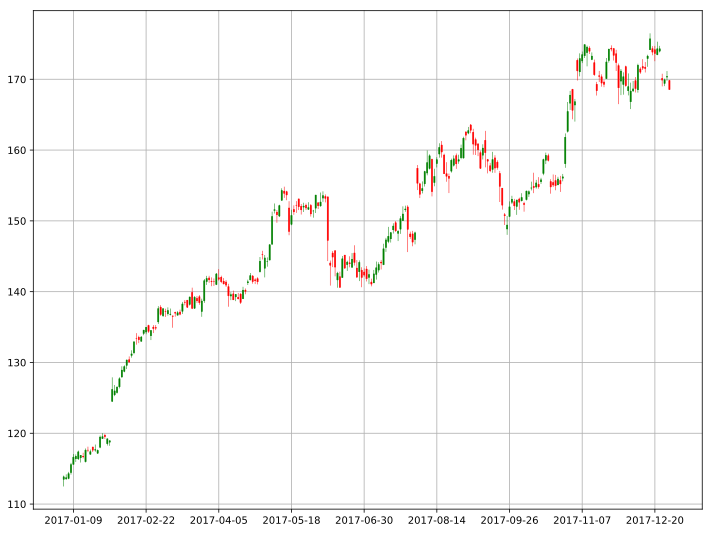

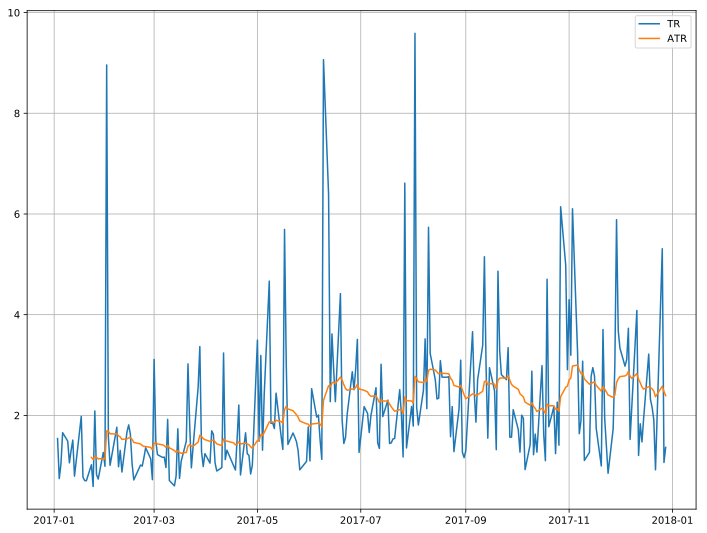

In [8]:
fig, ax = plt_candlestick_from_df(prices)

plt.subplots()
plt.plot(prices.TR)
plt.plot(prices.ATR)
plt.legend(['TR', 'ATR']);